## **1. Mengimpor Pustaka yang Diperlukan**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **2. Mengimpor Dataset**

In [2]:
dataset = pd.read_csv('obesity_data.csv')

In [3]:
dataset.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB
None


In [5]:
# periksa nilai yang hilang di setiap kolom
print(dataset.isnull().sum())

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = dataset.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    dataset[col] = label_encoders[col].fit_transform(dataset[col])

In [7]:
print("Tipe data setelah encoding:")
print(dataset.dtypes)

Tipe data setelah encoding:
Age                        int64
Gender                     int32
Height                   float64
Weight                   float64
BMI                      float64
PhysicalActivityLevel      int64
ObesityCategory            int32
dtype: object


In [8]:
# Menampilkan dataset yang sudah diolah
dataset.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0


In [9]:
X = dataset.iloc[:, [0, 4]].values
y = dataset.iloc[:, -1].values

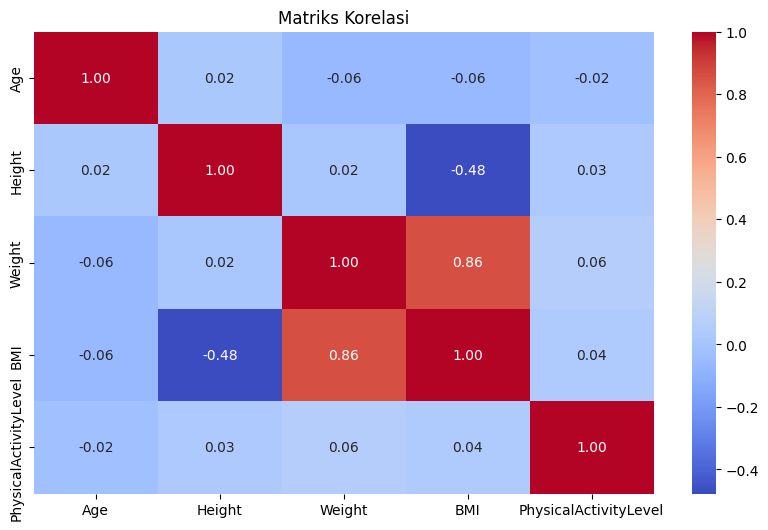

In [10]:
# Memilih hanya kolom numerik
numerical_data = dataset.select_dtypes(include=['int64', 'float64'])

# Menghitung korelasi
correlation_matrix = numerical_data.corr()

# Visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


## **3. Pembagian Dataset**

In [11]:
# Membagi dataset menjadi data pelatihan dan data pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
# Menampilkan nilai X_train dan y_train
print("\nFitur Pelatihan (X_train):")
print(X_train)
print("\nTarget Pelatihan (y_train):")
print(y_train)


Fitur Pelatihan (X_train):
[[54.         28.44306445]
 [27.         23.81557563]
 [67.         12.20558238]
 ...
 [43.         31.77809484]
 [32.         33.10006124]
 [49.         25.86572796]]

Target Pelatihan (y_train):
[2 0 3 0 0 2 1 2 2 1 1 2 2 1 0 2 2 0 0 3 1 0 2 2 0 2 1 0 3 0 2 2 0 2 3 1 1
 0 2 1 1 3 0 2 2 2 0 3 0 2 1 2 0 2 1 0 0 2 1 3 2 2 2 0 0 0 2 2 0 0 1 2 0 0
 2 3 0 2 1 2 3 2 0 1 3 2 0 1 3 0 1 0 2 2 0 3 1 1 1 0 0 2 0 0 0 1 2 0 0 3 3
 0 1 0 0 1 3 1 2 0 3 1 1 2 2 3 1 1 0 0 2 0 0 0 0 0 1 0 3 0 0 1 0 1 0 0 1 2
 0 1 0 2 3 0 1 3 1 2 2 0 3 2 3 1 0 0 2 0 3 1 0 0 0 2 1 1 2 2 3 0 0 0 3 2 3
 3 0 1 1 0 0 1 2 2 2 1 0 0 2 0 0 0 0 1 0 0 3 3 1 0 3 0 2 3 0 2 0 1 2 2 3 3
 0 0 2 0 3 3 0 3 2 0 2 1 0 3 2 3 2 3 2 3 3 0 0 0 3 0 2 0 0 0 0 1 2 3 3 3 2
 1 3 2 0 2 1 0 2 3 0 2 2 0 0 0 0 0 0 3 1 3 2 3 1 1 3 0 1 3 3 0 0 1 1 0 2 0
 0 2 0 0 1 2 1 0 1 2 1 0 0 1 2 2 1 2 3 1 0 1 0 1 3 0 0 3 2 0 0 1 2 1 2 0 2
 0 1 2 0 2 3 3 1 2 1 1 3 2 1 1 1 1 0 2 0 0 2 0 3 2 0 2 1 0 0 1 2 3 2 3 2 2
 0 2 0 3 0 2 0 2 2 0 2 1 

In [13]:
# Menampilkan nilai X_test dan y_test
print("\nFitur Pengujian (X_test):")
print(X_test)
print("\nTarget Pengujian (y_test):")
print(y_test)


Fitur Pengujian (X_test):
[[50.         20.48292263]
 [62.         25.10706426]
 [43.         20.50093634]
 [75.         26.845416  ]
 [18.         38.17316719]
 [65.         24.18521643]
 [19.         32.11218604]
 [75.         18.04103239]
 [73.         29.6187041 ]
 [46.         15.40255266]
 [41.         33.74685122]
 [23.         28.64113488]
 [58.         27.38883028]
 [74.         26.85619716]
 [64.         22.39443977]
 [54.         13.55421325]
 [49.         22.3630296 ]
 [64.         36.23518596]
 [41.         39.23616305]
 [61.         18.19058642]
 [29.         30.95208309]
 [78.         25.49461411]
 [41.         28.90119161]
 [22.         47.20736924]
 [37.         25.80243993]
 [24.         20.89085724]
 [79.         18.37312269]
 [31.         30.29705175]
 [54.         20.13269218]
 [69.         33.39520945]
 [60.         25.5791554 ]
 [63.         32.57325294]
 [65.          9.72537212]
 [31.         14.74546003]
 [71.         27.98809571]
 [73.         23.27485164]
 

## **4. Standardisasi Fitur**

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **5. Pelatihan model Naive Bayes pada data pelatihan**

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## **6. Prediksi hasil data pengujian**

In [16]:
y_pred = classifier.predict(X_test)

## **7. Evaluasi Model**

In [17]:
# Menghitung dan menampilkan confusion matrix dan akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)  
print("\nConfusion Matrix:")
print(cm)                                
print("\nAkurasi:", accuracy_score(y_test, y_pred))  


Confusion Matrix:
[[98  0  0  1]
 [ 0 46  1  0]
 [ 0  0 75  0]
 [ 0  0  0 29]]

Akurasi: 0.992


## **8. Visualisasi hasil pelatihan**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9112\2324696156.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


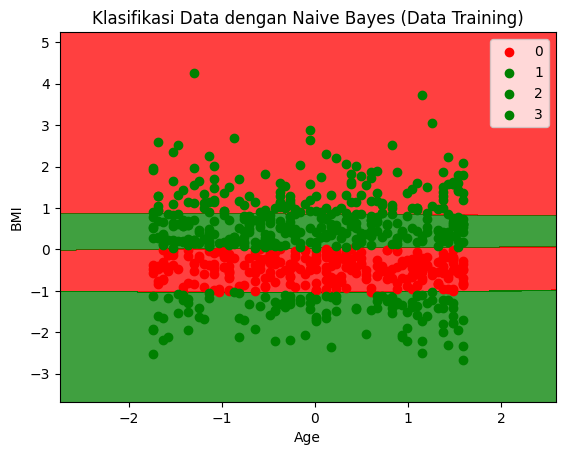

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.legend()
plt.show()

## **9. Visualisasi hasil pengujian**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9112\604935346.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


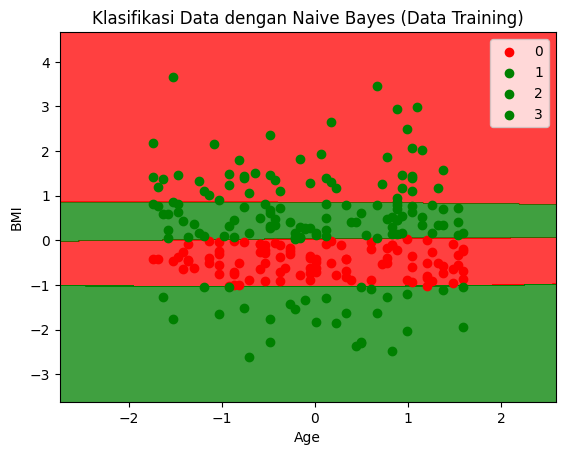

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
    plt.xlabel('Age')
    plt.ylabel('BMI')
    plt.legend()
plt.show()